<a href="https://colab.research.google.com/github/KrushnaTaur/ML-Practice/blob/main/ML_Lab_Experiments/ML_Experiment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###Step 1: Load the dataset

import pandas as pd
from google.colab import drive

# drive.mount('/content/drive')

# Load dataset
data = pd.read_csv("/content/Student_Dataset_Cleaned (2).csv")
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (4424, 33)


,Marital_status,Daytime_evening_attendance_,Previous_qualification,Previous_qualification_grade_,Mother_s_qualification,Father_s_qualification,Mother_s_occupation,Father_s_occupation,Admission_grade,Displaced,...,Curricular_units_2nd_sem_enrolled_,Curricular_units_2nd_sem_evaluations_,Curricular_units_2nd_sem_approved_,Curricular_units_2nd_sem_without_evaluations_,Unemployment_rate,Inflation_rate,GDP,Target,Overall_Performance,Financial_Stability_Score
0,0.693147,713.434901,0.693147,122.0,19,12,1.459736,1.829314,127.3,1,...,0,0,0,0.0,10.8,1.4,1.74,1,7.137500,354.933348
1,0.693147,713.434901,0.693147,160.0,1,3,1.181467,1.204206,142.5,1,...,6,6,6,0.0,13.9,-0.3,0.79,0,13.833333,0.000000
2,0.693147,713.434901,0.693147,122.0,37,37,1.774292,1.829314,124.8,1,...,6,0,0,0.0,10.8,1.4,1.74,1,7.137500,0.000000
3,0.693147,713.434901,0.693147,122.0,38,37,1.459736,1.204206,119.6,1,...,6,10,5,0.0,9.4,-0.8,-3.12,0,12.914286,354.933348
4,1.098612,0.000000,0.693147,100.0,37,38,1.774292,1.829314,141.5,0,...,6,6,6,0.0,13.9,-0.3,0.79,0,12.666667,354.933348


In [ ]:
###Step 2: Split features and target

X = data.drop('Target', axis=1)
y = data['Target']


In [ ]:
###Step 3: Train-Test Splitfrom sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

Training Samples: 3539, Testing Samples: 885


In [ ]:
####Step 4: Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
###Step 5: Train KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # using k=5
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
###Step 6: Predict and Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8305084745762712

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       569
           1       0.87      0.61      0.72       316

    accuracy                           0.83       885
   macro avg       0.84      0.78      0.80       885
weighted avg       0.84      0.83      0.82       885



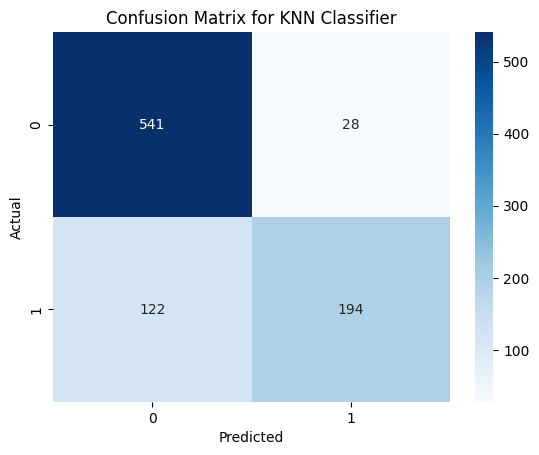

In [ ]:
###Step 7: Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
